## Importing the libraries

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [11]:
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [13]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## EDA

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
data_train[['temp']].describe()

,temp
count,10886.00000
mean,20.23086
std,7.79159
min,0.82000
25%,13.94000
50%,20.50000
75%,26.24000
max,41.00000


In [17]:
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [19]:
data_train.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
7132,2012-04-15 13:00:00,2,0,0,1,27.06,31.060,44,19.0012,298,383,681
7349,2012-05-05 14:00:00,2,0,0,3,28.70,32.575,61,19.9995,187,241,428
3522,2011-08-16 16:00:00,3,0,1,1,32.80,35.605,41,15.0013,55,248,303
6614,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205
7996,2012-06-13 13:00:00,2,0,1,2,28.70,31.820,45,26.0027,52,203,255
7466,2012-05-10 11:00:00,2,0,1,1,21.32,25.000,48,35.0008,77,179,256
4042,2011-09-19 11:00:00,3,0,1,2,23.78,27.275,64,11.0014,41,98,139
10001,2012-11-02 02:00:00,4,0,1,1,13.12,15.910,66,11.0014,3,7,10
2047,2011-05-12 05:00:00,2,0,1,1,17.22,21.210,94,8.9981,2,27,29
148,2011-01-07 11:00:00,1,0,1,2,8.20,9.850,40,15.0013,19,48,67


In [20]:
df = data_train.copy()

In [21]:
df['datetime'] = data_train['datetime'].apply(lambda x: int(x[-8:-6]))

In [24]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [34]:
df.nunique()

datetime       24
season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [37]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Data Preprocessing

In [40]:
df[['temp','atemp','humidity','windspeed']].describe()

,temp,atemp,humidity,windspeed
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395
std,7.79159,8.474601,19.245033,8.164537
min,0.82000,0.760000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500
50%,20.50000,24.240000,62.000000,12.998000
75%,26.24000,31.060000,77.000000,16.997900
max,41.00000,45.455000,100.000000,56.996900


In [42]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [44]:
d0 = df.groupby('datetime').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'})
d0['percent of registered'] = d0['registered'] / d0['count'] * 100
d0

,casual,registered,count,percent of registered
datetime,,,,
0,4692,20396,25088,81.297832
1,2957,12415,15372,80.763726
2,2159,8100,10259,78.955064
3,1161,3930,5091,77.195050
4,558,2274,2832,80.296610
5,658,8277,8935,92.635702
6,1888,32810,34698,94.558764
7,4966,92002,96968,94.878723
8,9802,155258,165060,94.061553


In [45]:
season_mapping = {1 : 'spring',2 : 'summer',3 : 'fall',4 : 'winter',}
df2 = df.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'})
df2['percent of registered'] = df2['registered'] / df2['count'] * 100
df2['season'] = df2.index.map(season_mapping)
df2.set_index('season', inplace=True)
df2

,casual,registered,count,percent of registered
season,,,,
spring,41605,270893,312498,86.686315
summer,129672,458610,588282,77.957510
fall,142718,497944,640662,77.723355
winter,78140,465894,544034,85.636927


In [46]:
holiday_mapping = {0 : 'non-holiday',1 : 'holiday'}
df3 = df.groupby('holiday').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'})
df3['percent of registered'] = df3['registered'] / df3['count'] * 100
df3['holiday'] = df3.index.map(holiday_mapping)
df3.set_index('holiday', inplace=True)
df3

,casual,registered,count,percent of registered
holiday,,,,
non-holiday,376964,1650704,2027668,81.408988
holiday,15171,42637,57808,73.756228


In [50]:
workingday_mapping = {0 : 'weekend',1 : 'workingday'}
df4 = df.groupby('workingday').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'})
df4['percent of registered'] = df4['registered'] / df4['count'] * 100
df4['workingday'] = df4.index.map(workingday_mapping)
df4.set_index('workingday', inplace=True)
df4

,casual,registered,count,percent of registered
workingday,,,,
weekend,206037,448835,654872,68.537821
workingday,186098,1244506,1430604,86.991648


In [51]:
df5 = df.copy()
temp_mapping = {1 : 'cold',2 : 'moderate',3 : 'hot'}
df5['temperature'] = df['atemp'].apply(lambda x:  1 if x <17 else (2 if x<=27 else 3))
df5 = df5.groupby('temperature').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'})
df5['percent of registered'] = df5['registered'] / df5['count'] * 100
df5['temperature'] = df5.index.map(temp_mapping)

# df5 = df5.reset_index().set_index('temperature')
df5.set_index('temperature', inplace=True)
# df5.sample(10)
df5

,casual,registered,count,percent of registered
temperature,,,,
cold,26864,284110,310974,91.361336
moderate,116023,579545,695568,83.319675
hot,249248,829686,1078934,76.898680


In [55]:
df6 = df.copy()
wind_mapping = {1 : 'Calm',2 : 'Light Breeze',3 : 'Moderate Breeze',4 : 'Stronge Breeze'}
df6['WindSpeed'] = df['windspeed'].apply(lambda x:  1 if x <4 else (2 if x<12 else (3 if x<25 else 4)))
df6 = df6.groupby('WindSpeed').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'})
df6['percent of registered'] = df6['registered'] / df6['count'] * 100
df6['WindSpeed'] = df6.index.map(wind_mapping)
df6.set_index('WindSpeed', inplace=True)
df6

,casual,registered,count,percent of registered
WindSpeed,,,,
Calm,39135,172391,211526,81.498728
Light Breeze,128423,586656,715079,82.040726
Moderate Breeze,188606,789125,977731,80.709827
Stronge Breeze,35971,145169,181140,80.141879


In [56]:
weather_mapping = {1 : 'Clear',2 : 'Cloudy',3 : 'Rainy',4 : 'Heavy rain',}
df7 = df.groupby('weather').agg({'casual': 'sum', 'registered': 'sum', 'count': 'sum'}) #.agg( ' ' : 'sum' or 'mean' or 'count' ...
df7['percent of registered'] = df7['registered'] / df7['count'] * 100
df7['Weather'] = df7.index.map(weather_mapping)
df7.set_index('Weather', inplace=True)
df7

,casual,registered,count,percent of registered
Weather,,,,
Clear,289900,1186163,1476063,80.359917
Cloudy,87246,419914,507160,82.797145
Rainy,14983,87106,102089,85.323590
Heavy rain,6,158,164,96.341463


## Strorytelling - Visualization

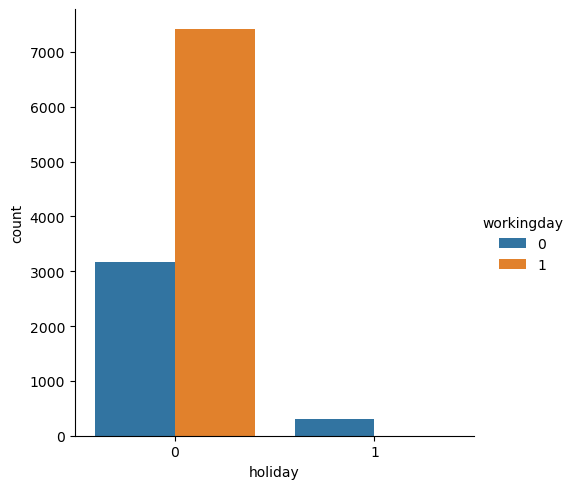

In [60]:
sns.catplot(x='holiday', hue='workingday', kind='count', data=df)

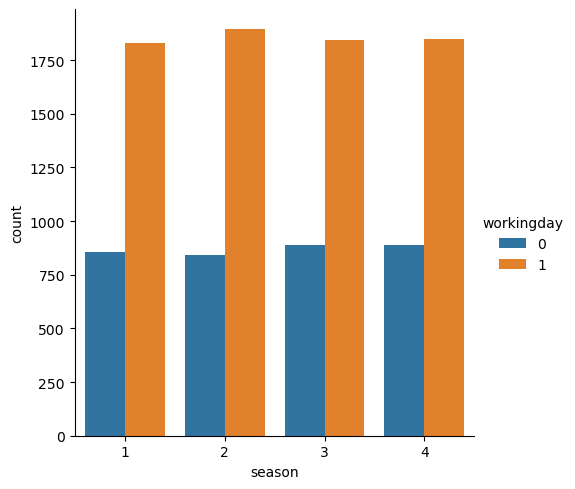

In [61]:
sns.catplot(x='season', hue='workingday', kind='count', data=df)

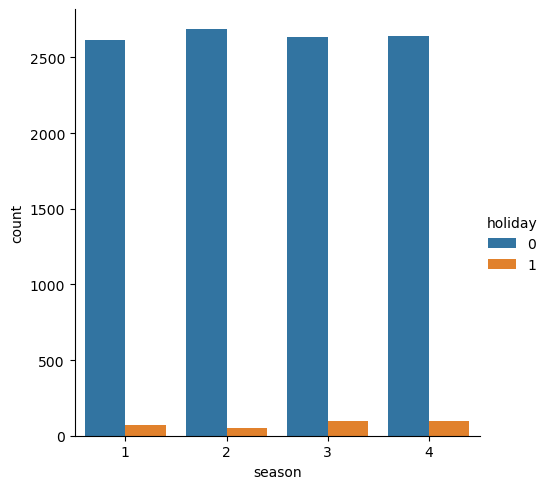

In [62]:
sns.catplot(x='season', hue='holiday', kind='count', data=df)

In [64]:
# sns.catplot(x='season' ,kind="count",data=df, palette=sns.color_palette())

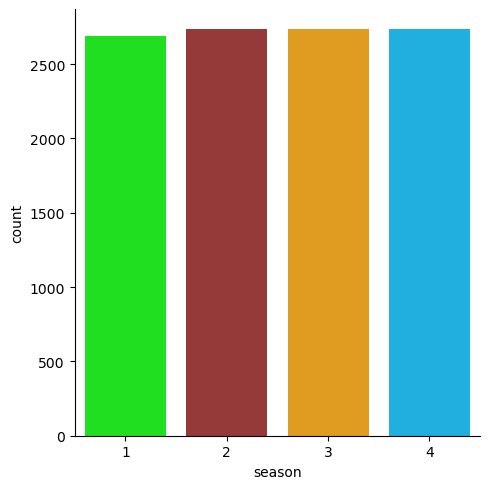

In [65]:
sns.catplot(x='season' ,kind="count",data=df, palette={'1': '#00ff00', '2' : 'brown', '3': 'orange' , '4' : '#00bfff'})

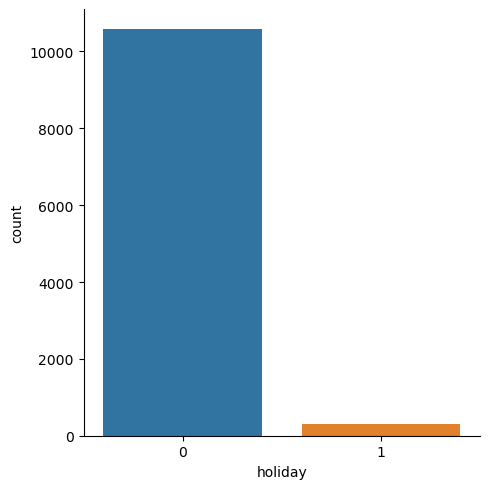

In [67]:
sns.catplot(x='holiday' ,kind="count",data=df, palette=sns.color_palette())

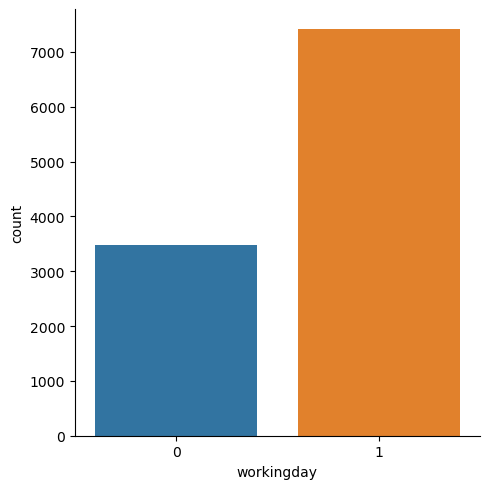

In [70]:
sns.catplot(x='workingday' ,kind="count",data=df,palette=sns.color_palette())

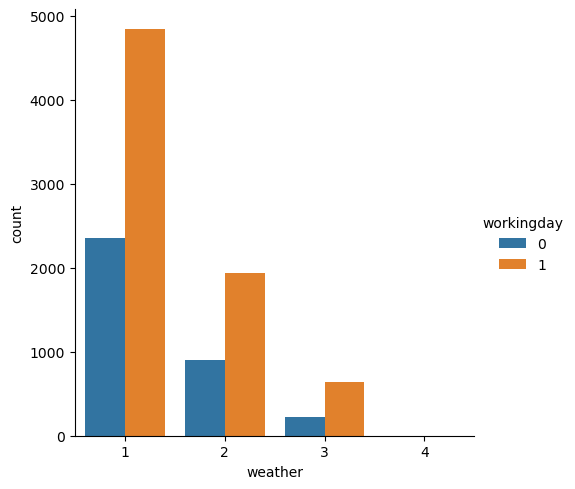

In [72]:
sns.catplot(x='weather', hue='workingday', kind='count', data=df)

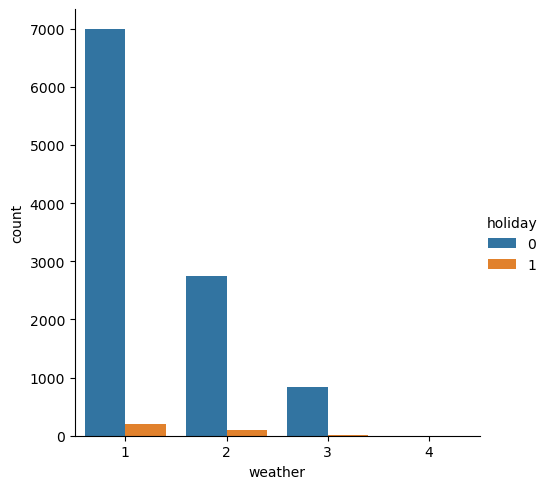

In [73]:
sns.catplot(x='weather', hue='holiday', kind='count', data=df)

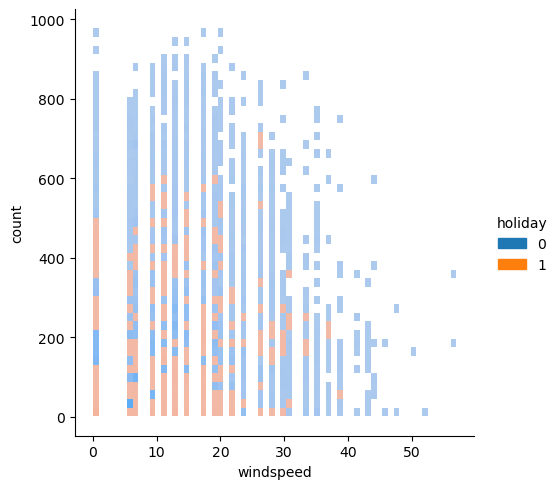

In [75]:
sns.displot(df, x="windspeed", y="count", hue='holiday', kind='hist')

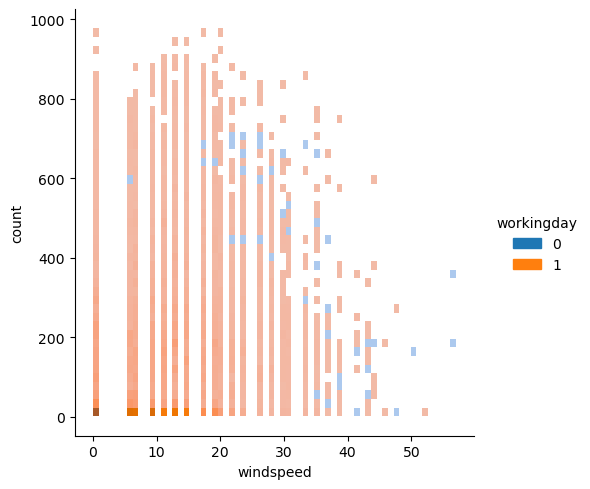

In [77]:
sns.displot(df, x="windspeed", y="count", hue='workingday', kind='hist')

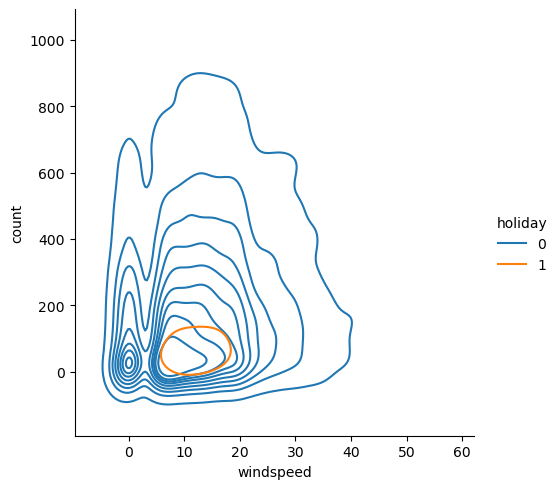

In [78]:
sns.displot(df, x="windspeed", y="count", hue='holiday', kind='kde')

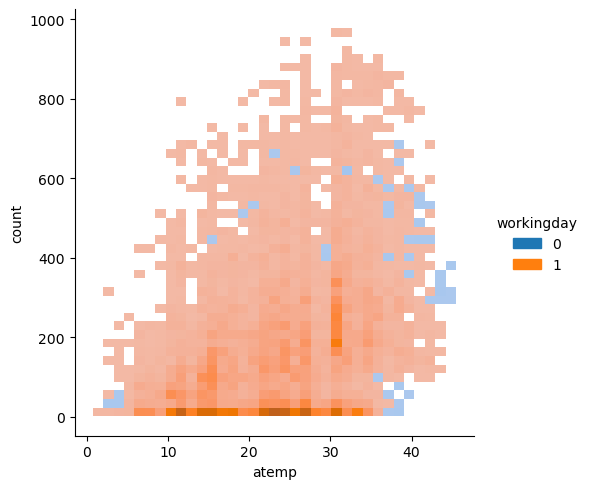

In [80]:
sns.displot(df, x="atemp", y="count", hue='workingday', kind='hist')

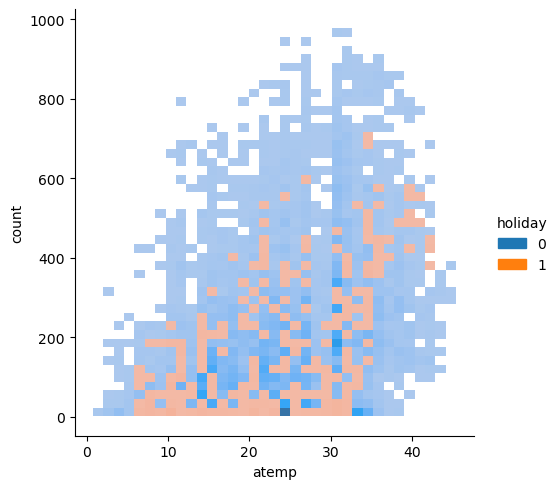

In [81]:
sns.displot(df, x="atemp", y="count", hue='holiday', kind='hist')

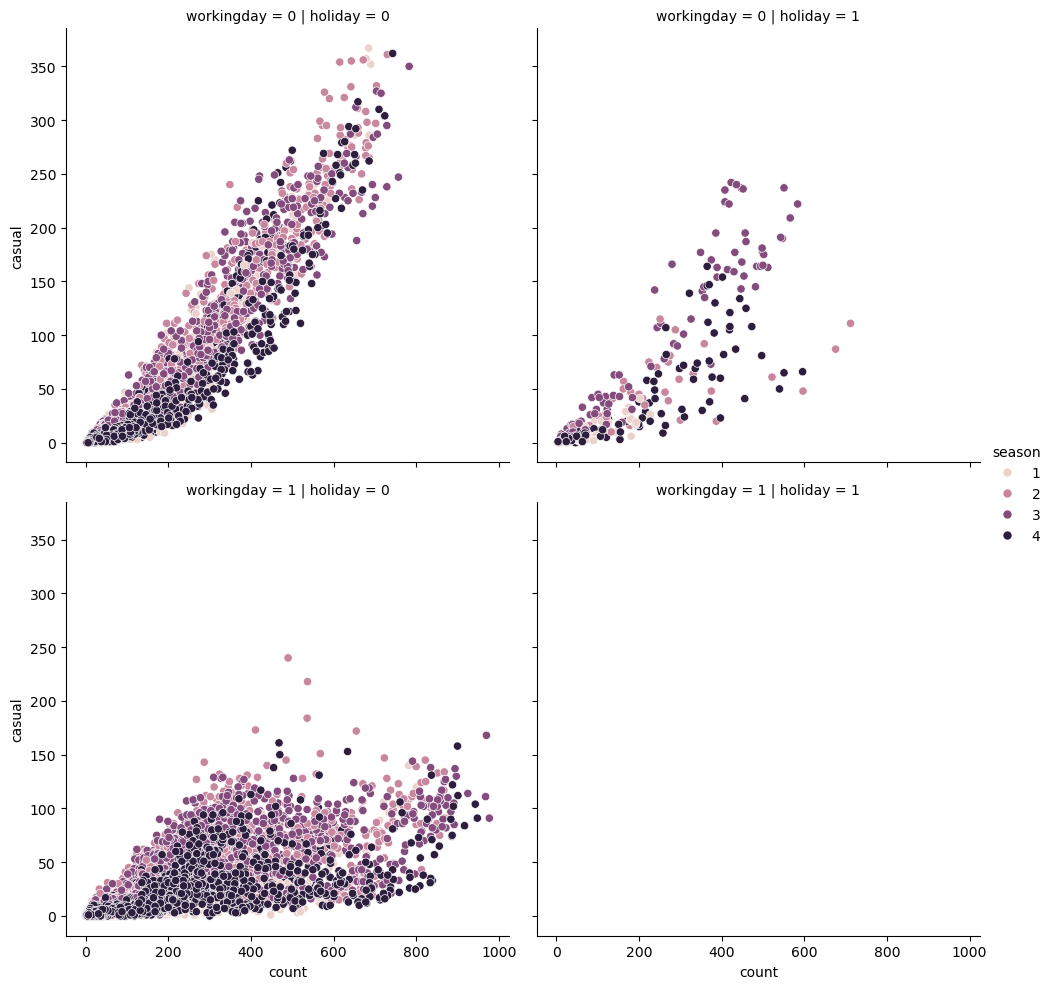

In [83]:
sns.relplot(data=df, x="count", y="casual", hue="season", col="holiday", row="workingday")


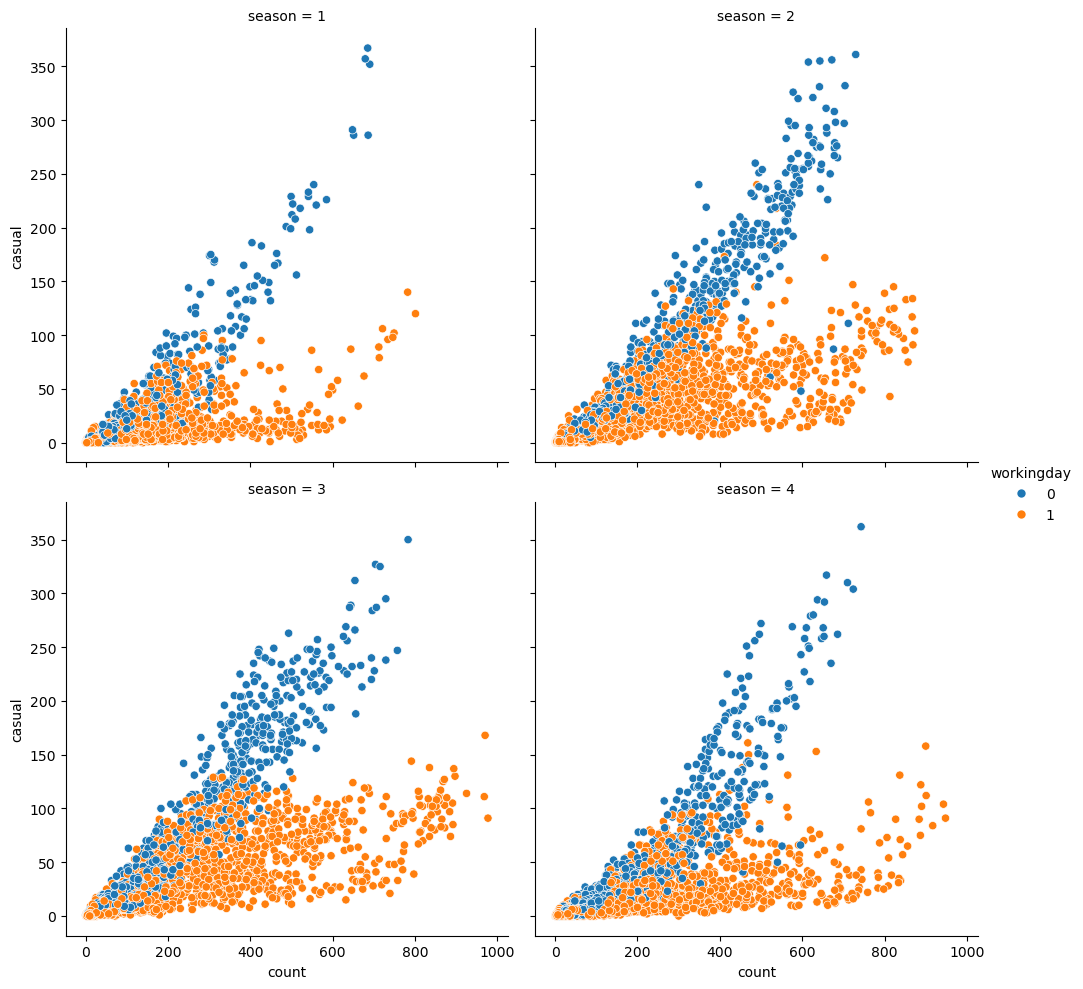

In [85]:
sns.relplot(data=df, x="count", y="casual", hue="workingday", col="season", col_wrap=2)


In [88]:
corr = df.drop(['registered','casual'], axis=1).corr()
corr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.400601
season,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.145430,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.140343,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.278011,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,0.146631,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.400601,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


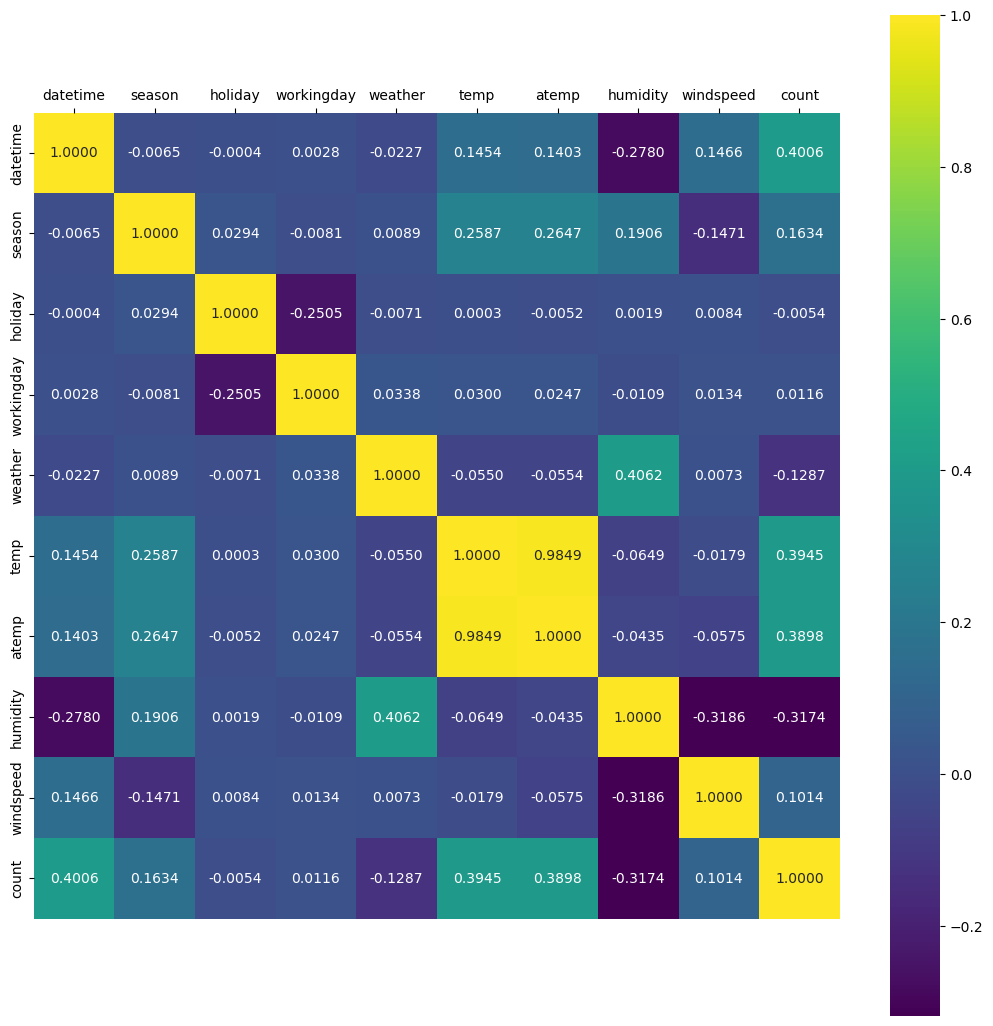

In [89]:
plt.figure(figsize=(13,13))
ax = sns.heatmap(corr, cmap='viridis', fmt='.4f',square= True, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

## Train your model (Regression)

In [93]:
from sklearn.model_selection import train_test_split # a data for test and a data training
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [94]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [95]:
X1 = df[['temp']]
Y1 = df['count']
# X1
# Y1

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.4, random_state = 4)

In [97]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [98]:
slr.intercept_ #b0

6.602020584468534

In [99]:
slr.coef_ #b1

array([9.10762922])

In [100]:
# y = 6 + 9.1 x

In [101]:
coeffcients = pd.DataFrame([X_train.columns,slr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,temp,9.107629


In [102]:
from sklearn import metrics

In [103]:
y_pred = slr.predict(X_train)

In [104]:
print('(MSE) Mean Squared Error :',metrics.mean_squared_error(y_train, y_pred) , '\n')
print('(RMSE) Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_train, y_pred)) , '\n')
print('(MAE) Mean Absolute Error :',metrics.mean_absolute_error(y_train, y_pred) , '\n')
print('(MAPE) Mean Absolute Percentage Error :', metrics.mean_absolute_percentage_error(y_train, y_pred) , '\n')
print('(R^2) R-Squared :',metrics.r2_score(y_train, y_pred) , '\n')

(MSE) Mean Squared Error : 27674.34638703788 

(RMSE) Root Mean Squared Error : 166.35608310800623 

(MAE) Mean Absolute Error : 126.42837155702776 

(MAPE) Mean Absolute Percentage Error : 5.714469318689321 

(R^2) R-Squared : 0.1537890752501967 



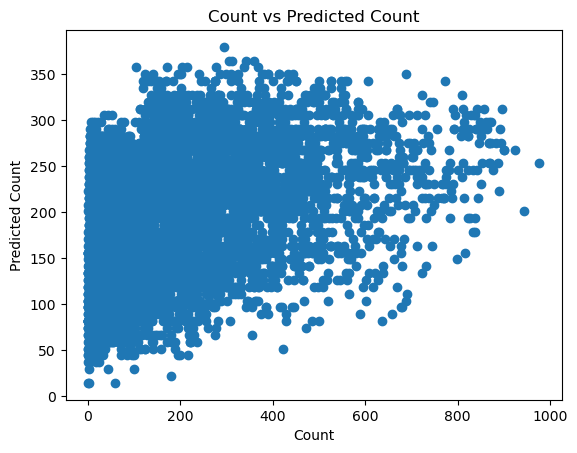

In [105]:
plt.scatter(y_train, y_pred)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count")
plt.show()

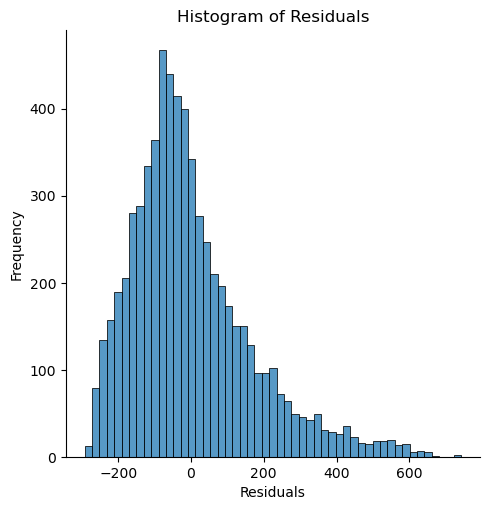

In [106]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# SCALING

In [407]:
# df

In [409]:
from sklearn.preprocessing import StandardScaler
scale = df.copy()
sc = StandardScaler()

In [411]:
# scale

In [413]:
XX = scale[['datetime','season' , 'holiday' , 'workingday' , 'weather' , 'temp' , 'atemp' , 'humidity' , 'windspeed' ]]
YY = scale['count']

In [415]:
XX_train, XX_test , yy_train , yy_test = train_test_split(XX,YY,test_size=0.4,random_state=26) 


In [417]:
XX_train = sc.fit_transform(XX_train)
XX_test = sc.transform(XX_test)

In [419]:
# XX_train

In [421]:
XX_train = pd.DataFrame(XX_train)

In [423]:
# XX_train

In [425]:
regressor = LinearRegression()
regressor.fit(XX_train, yy_train) # training model

LinearRegression()

In [427]:
regressor.intercept_

188.38967998775072

In [429]:
regressor.coef_

array([ 51.16756279,  19.9271783 ,  -1.22080293,   0.34679247,
        -1.54887243,  11.92392105,  43.24805319, -42.68452059,
         2.45074864])

In [431]:
yy_pred = regressor.predict(XX_train)

In [433]:
print('(MSE) Mean Squared Error :', metrics.mean_squared_error(yy_train, yy_pred) , '\n')
print('(RMSE) Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(yy_train, yy_pred)) , '\n')
print('(MAE) Mean Absolute Error :', metrics.mean_absolute_error(yy_train, yy_pred) , '\n')
print('(MAPE) Mean Absolute Percentage Error :', metrics.mean_absolute_percentage_error(yy_train, yy_pred) , '\n')
print('(R^2) R-Squared :', metrics.r2_score(yy_train, yy_pred) , '\n')

(MSE) Mean Squared Error : 21016.309685195058 

(RMSE) Root Mean Squared Error : 144.97003030004186 

(MAE) Mean Absolute Error : 105.89606919975692 

(MAPE) Mean Absolute Percentage Error : 3.1774643698820526 

(R^2) R-Squared : 0.3357590597737937 



In [435]:
# XX_train

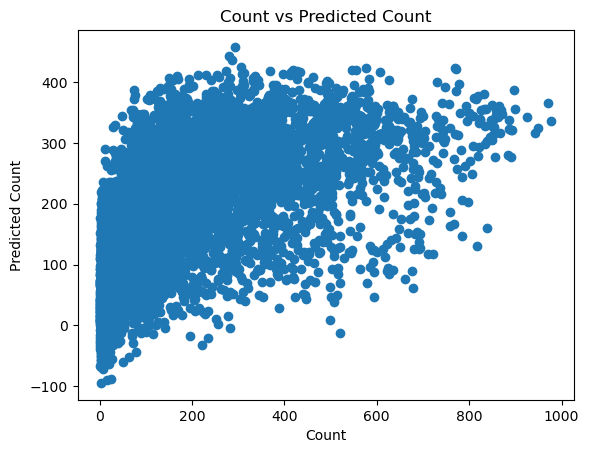

In [437]:
plt.scatter(yy_train, yy_pred)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count")
plt.show()

In [353]:
X = df[['datetime','season' , 'holiday' , 'workingday' , 'weather' , 'temp' , 'atemp' , 'humidity' , 'windspeed' ]]
Y = df['count']

In [355]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.4,random_state=26) # 25% of data for test 75%-for-train


In [357]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # training model

LinearRegression()

In [359]:
regressor.intercept_

43.133469177983415

In [361]:
regressor.coef_

array([ 7.41498998, 17.9037225 , -7.55986916,  0.74847802, -2.44193449,
        1.53086483,  5.10807068, -2.21919377,  0.30019892])

In [395]:
# X_train

In [329]:
# X_test

In [259]:
# y_test

In [261]:
coeffcients = pd.DataFrame([X_train.columns,regressor.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,datetime,7.41499
1,season,17.903723
2,holiday,-7.559869
3,workingday,0.748478
4,weather,-2.441934
5,temp,1.530865
6,atemp,5.108071
7,humidity,-2.219194
8,windspeed,0.300199


In [263]:
y_pred = regressor.predict(X_train)

In [265]:
print('(MSE) Mean Squared Error :', metrics.mean_squared_error(y_train, y_pred) , '\n')
print('(RMSE) Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_train, y_pred)) , '\n')
print('(MAE) Mean Absolute Error :', metrics.mean_absolute_error(y_train, y_pred) , '\n')
print('(MAPE) Mean Absolute Percentage Error :', metrics.mean_absolute_percentage_error(y_train, y_pred) , '\n')
print('(R^2) R-Squared :', metrics.r2_score(y_train, y_pred) , '\n')

(MSE) Mean Squared Error : 21016.309685195054 

(RMSE) Root Mean Squared Error : 144.97003030004186 

(MAE) Mean Absolute Error : 105.89606919975691 

(MAPE) Mean Absolute Percentage Error : 3.1774643698820526 

(R^2) R-Squared : 0.33575905977379383 



In [397]:
# X_train


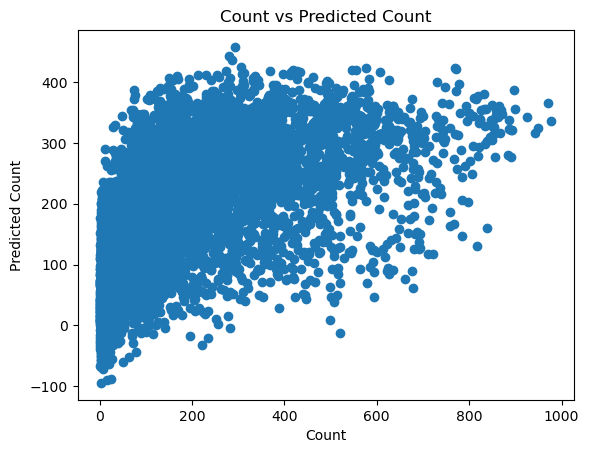

In [74]:
plt.scatter(y_train, y_pred)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count")
plt.show()

In [75]:
y_pred = regressor.predict(X_test)

In [76]:
print('(MSE) Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred) , '\n')
print('(RMSE) Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) , '\n')
print('(MAE) Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred) , '\n')
print('(MAPE) Mean Absolute Percentage Error :', metrics.mean_absolute_percentage_error(y_test, y_pred) , '\n')
print('(R^2) R-Squared :', metrics.r2_score(y_test, y_pred) , '\n')

(MSE) Mean Squared Error : 23043.1529607681 

(RMSE) Root Mean Squared Error : 151.79971330924212 

(MAE) Mean Absolute Error : 111.32974175724324 

(MAPE) Mean Absolute Percentage Error : 3.212466504488311 

(R^2) R-Squared : 0.33262315991240066 



In [77]:
X.sample(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
634,15,1,0,1,2,8.2,9.09,34,19.0012


In [78]:
L1 = [i for i in df['datetime']]
d1= [index for index, value in enumerate(L1) if value== 17]
d1=df.iloc[d1]
d1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17,17,1,0,0,2,18.04,21.970,82,19.0012,15,52,67
40,17,1,0,0,1,13.94,16.665,57,12.9980,7,58,65
62,17,1,0,1,1,9.84,11.365,30,15.0013,11,146,157
85,17,1,0,1,1,11.48,13.635,48,15.0013,10,202,212
108,17,1,0,1,1,9.84,11.365,38,12.9980,4,186,190
...,...,...,...,...,...,...,...,...,...,...,...,...
10783,17,4,0,0,1,16.40,20.455,50,15.0013,35,274,309
10807,17,4,0,0,2,15.58,19.695,82,7.0015,29,214,243
10831,17,4,0,1,2,16.40,20.455,94,16.9979,17,478,495
10855,17,4,0,1,1,16.40,20.455,47,30.0026,39,533,572


In [79]:
L2 = [i for i in d1['season']]
d2= [index for index, value in enumerate(L2) if value== 1]
d2=d1.iloc[d2]
d2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17,17,1,0,0,2,18.04,21.970,82,19.0012,15,52,67
40,17,1,0,0,1,13.94,16.665,57,12.9980,7,58,65
62,17,1,0,1,1,9.84,11.365,30,15.0013,11,146,157
85,17,1,0,1,1,11.48,13.635,48,15.0013,10,202,212
108,17,1,0,1,1,9.84,11.365,38,12.9980,4,186,190
...,...,...,...,...,...,...,...,...,...,...,...,...
6682,17,1,0,1,1,28.70,31.820,39,16.9979,79,634,713
6706,17,1,0,1,3,19.68,23.485,82,6.0032,23,235,258
6730,17,1,0,0,1,26.24,31.060,50,8.9981,291,357,648
6754,17,1,0,0,1,22.96,26.515,64,6.0032,233,308,541


In [80]:
L3 = [i for i in d2['holiday']]
d3= [index for index, value in enumerate(L3) if value== 1]
d3=d2.iloc[d3]
d3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
389,17,1,1,0,1,8.20,9.850,51,12.9980,4,67,71
5462,17,1,1,0,1,10.66,11.365,35,26.0027,17,136,153
5797,17,1,1,0,1,10.66,11.365,48,22.0028,19,174,193


In [81]:
new_condition =  np.array([17,1,1,0,4,16,14,60,14]).reshape(1,-1)
print('''\nWith three features of the obtained values ​​equal to: 71 , 153 , 193
\n\nThe number of people who are predicted to rent a bicycle :''',regressor.predict(new_condition))


With three features of the obtained values ​​equal to: 71 , 153 , 193


The number of people who are predicted to rent a bicycle : [136.82239962]


In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)

# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [84]:
metrics.r2_score(y_train, y_train_predicted)

0.4883070902198411

In [85]:
metrics.r2_score(y_test, y_test_predicted)

0.487120433033401

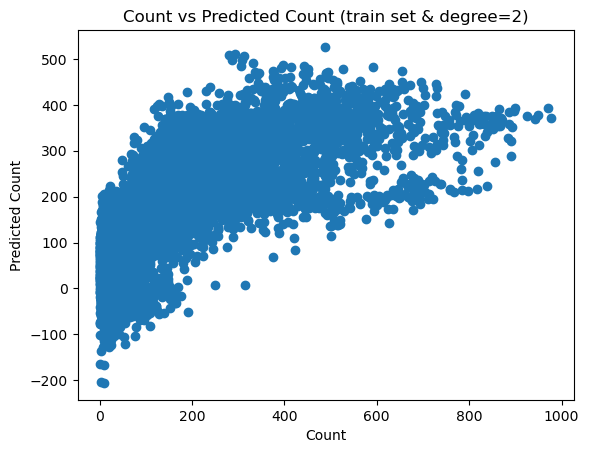

In [86]:
plt.scatter(y_train, y_train_predicted)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count (train set & degree=2)")
plt.show()

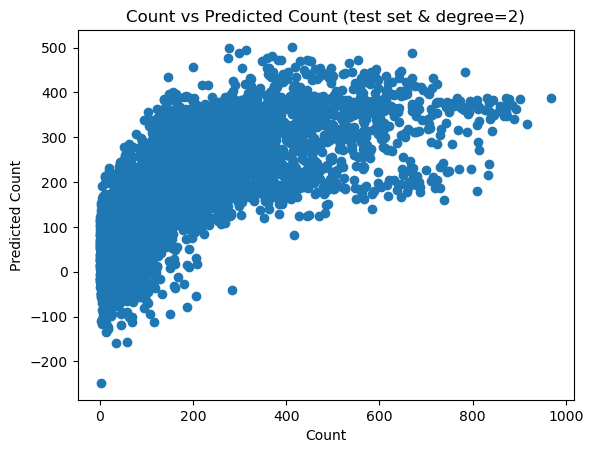

In [87]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count (test set & degree=2)")
plt.show()

In [88]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_cubic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_cubic, y_train)
     
# predicting on training data-set
y_train_predicted = cubic.predict(X_train_cubic)
   
# predicting on test data-set
y_test_predicted = cubic.predict(poly_features.fit_transform(X_test))

In [89]:
metrics.r2_score(y_train, y_train_predicted)

0.5658103338202298

In [90]:
metrics.r2_score(y_test, y_test_predicted) # negative results means overfitting in data, so we need reduce degree or features

0.5517616037009176

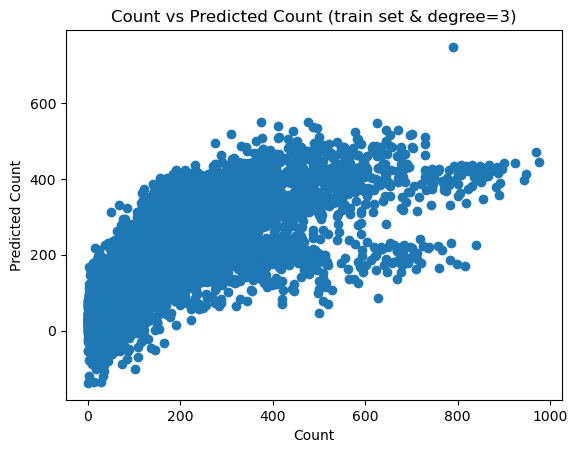

In [91]:
plt.scatter(y_train, y_train_predicted)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count (train set & degree=3)")
plt.show()

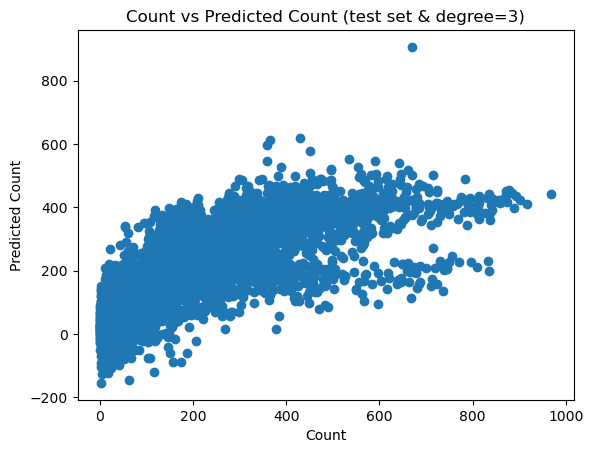

In [92]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count (test set & degree=3)")
plt.show()

In [93]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=4)
   
# transform the features to higher degree features.
X_train_cubic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_cubic, y_train)
     
# predicting on training data-set
y_train_predicted = cubic.predict(X_train_cubic)
   
# predicting on test data-set
y_test_predicted = cubic.predict(poly_features.fit_transform(X_test))

In [94]:
metrics.r2_score(y_train, y_train_predicted)

0.6240007916970622

In [95]:
metrics.r2_score(y_test, y_test_predicted) # negative results means overfitting in data, so we need reduce degree or features

0.4404854879860759

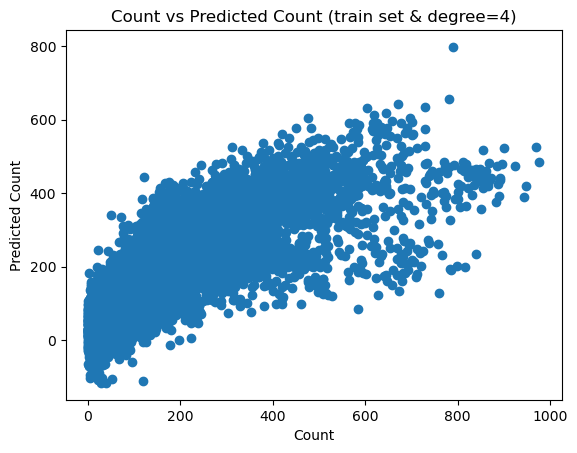

In [96]:
plt.scatter(y_train, y_train_predicted)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count (train set & degree=4)")
plt.show()

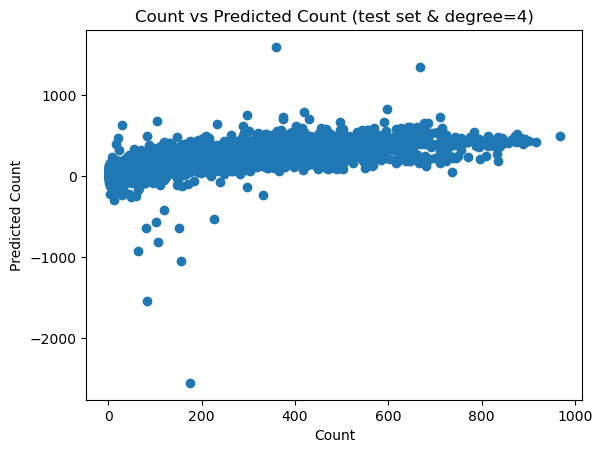

In [97]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel("Count")
plt.ylabel("Predicted Count")
plt.title("Count vs Predicted Count (test set & degree=4)")
plt.show()